In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta as rd

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:///../hawaii.sqlite')

In [20]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [21]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [57]:
# Find the most recent date in the data set.
# result return an iterable object
result = session.execute('select MAX(date) from measurement').fetchall()
most_recent_date = None
# Put result through a for loop to return it as a string
for row in result:
    most_recent_date = row[0]
most_recent_date

'2017-08-23'

In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
date = str(most_recent_date).split('-')
year = int(date[0])
month = int(date[1])
day = int(date[2])
# Starting from the most recent data point in the database. 
most_recent_date = dt.datetime(year, month, day)

# Calculate the date one year from the last date in data set.
twelve_months = most_recent_date + rd(months=-12)
twelve_months


# Perform a query to retrieve the data and precipitation scores
result1=session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > twelve_months).all()
result1
# Save the query results as a Pandas DataFrame and set the index to the date column
date_list= []
prcp_list = []

for row in result1:
    date = row[0]
    prcp = row[1]
    date_list.append(date)
    prcp_list.append(prcp)

info = {
    "date":date_list,
    "prcp":prcp_list
}
prcp_pd=pd.DataFrame(data=info)

# Sort the dataframe by date
sorted_prcp_pd=prcp_pd.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp_pd['prcp'] = sorted_prcp_pd['prcp'].fillna(0)
sorted_prcp_pd

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,0.00
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


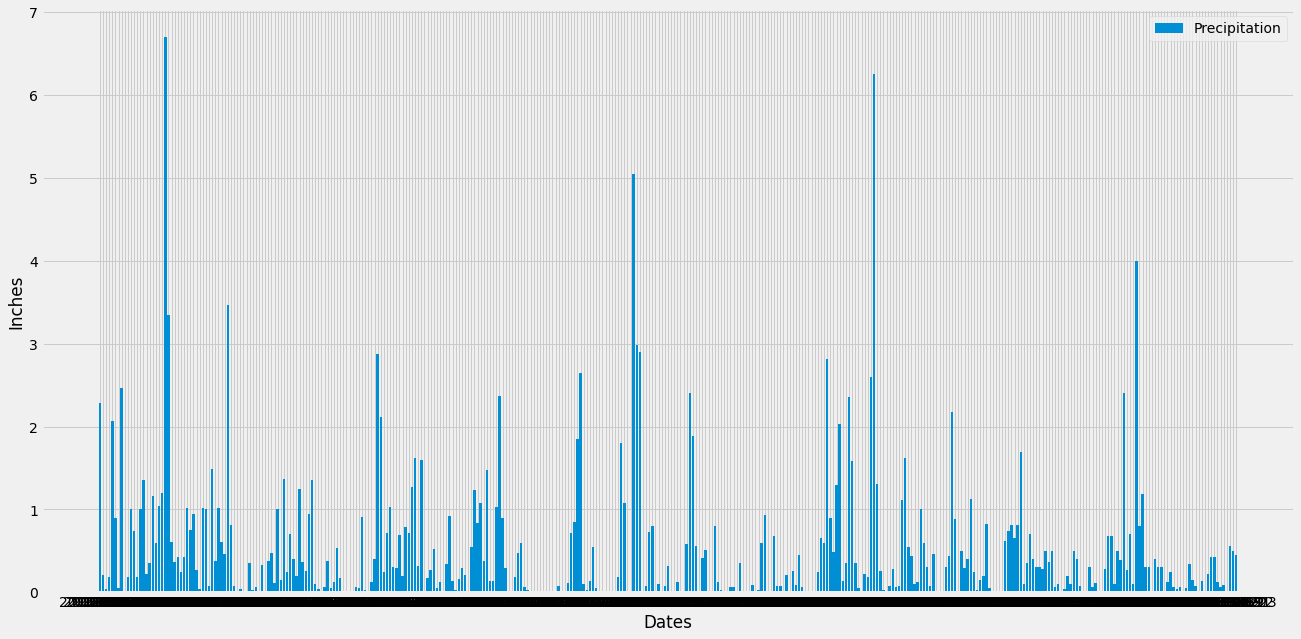

In [67]:
# sorted_prcp_pd.plot.bar(x='date',y='prcp')
plt.figure(figsize=(20,10))
plt.grid(True)
plt.bar(sorted_prcp_pd['date'], sorted_prcp_pd['prcp'])
plt.xlabel("Dates")
plt.ylabel("Inches")
plt.legend(['Precipitation'], loc="upper right")
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()